In [49]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

In [50]:
img = cv2.imread("panda.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [51]:
img.shape

(164, 308, 3)

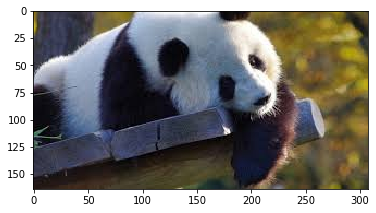

In [52]:
plt.imshow(img)
plt.show()

In [53]:
img =cv2.resize(img, (500,330))


In [54]:
img.shape

(330, 500, 3)

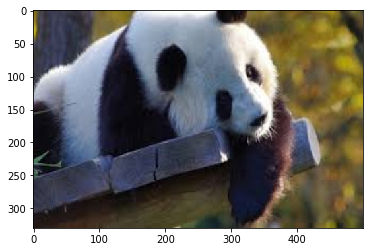

In [55]:
plt.imshow(img)

In [56]:
img_reshape = img.reshape((-1,3))

In [57]:
img_reshape.shape

(165000, 3)

In [58]:
from sklearn.cluster import KMeans

In [59]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(img_reshape)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
centers = km.cluster_centers_

In [62]:
centers = np.round(centers)

In [63]:
print(centers)

[[ 28.  27.  33.]
 [122. 134. 151.]
 [ 93.  84.  61.]
 [210. 212. 217.]]


## Plotting the colors present in the Image:

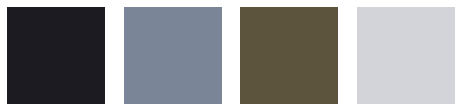

In [65]:
c= 1
plt.figure(0,figsize=(8,2))

for color in centers:
    
    plt.subplot(1,dominant_colors,c)
    plt.axis("off")
    c+=1
    
    plot  = np.zeros((100,100,3))
    
    plot[:,:,:] = color
    
    plot = np.array(plot, dtype="int")
    plt.imshow(plot)
    
plt.show()

In [66]:
extracted_img = np.zeros((img.shape[0]*img.shape[1],3), dtype="int")

In [67]:
centers

array([[ 28.,  27.,  33.],
       [122., 134., 151.],
       [ 93.,  84.,  61.],
       [210., 212., 217.]])

In [68]:
km.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [70]:
for i in range(extracted_img.shape[0]):
    extracted_img[i] = centers[km.labels_[i]]

In [71]:
extracted_img.shape

(165000, 3)

In [72]:
extracted_img = extracted_img.reshape((img.shape[0],img.shape[1],3))

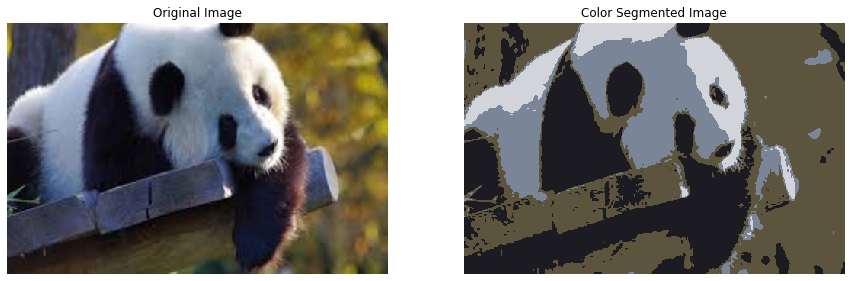

In [75]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(extracted_img)
plt.title("Color Segmented Image")
plt.axis("off")
plt.show()